In [76]:
import sys
sys.path.append("../")

import pandas as pd
import os

from library import regulations
from library import analysis
from library import tables

import pandas as pd
import os
import numpy as np
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf


In [77]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8,416) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
data = data[data.year == 'yr1718']

In [79]:
data[data.doi == True]['students_num'].sum()

3832308

In [80]:
data[data.doi == True]['students_num'].sum()/data['students_num'].sum()

0.7171457796031838

In [81]:
data['students_num'].sum()
data[data['reg21_003'] == True]['students_num'].sum()

2575560

In [82]:
x = data[data['reg21_003'] == True]['students_num'].sum()/data['students_num'].sum()
x.round(2)

0.48

In [83]:
x = data[data['reg21_003'] == True]['students_hisp'].sum()/data['students_hisp'].sum()
x.round(2)

0.41

In [84]:
x = data[data['reg21_003'] == True]['students_white'].sum()/data['students_white'].sum()
x.round(2)

0.57

In [85]:
x = data[data['reg21_003'] == True]['students_black'].sum()/data['students_black'].sum()
x.round(2)

0.38

In [86]:
data['reg21_003'] = np.where((data['reg21_003'] != 1), 0, 1)
data[data['reg21_003'] == True]['students_num'].sum()

2575560

In [87]:
x = data[data['reg21_003'] == 1]['reg21_003'].count()/data['reg21_003'].count()
x.round(2)

0.48

In [88]:
data['bins_students']  = pd.qcut(data['students_num'], 5)
#p_doi = pd.DataFrame(data[['doi', 'avescores']].groupby(data['bins_avescores']).mean().round(2))
p_doi = data.groupby(['bins_students'])[['reg21_003', 'students_num']].agg({'ave': 'mean', 'sd': 'std', 'n': 'count'})
p_doi = p_doi.reset_index()
n_sqrt = np.sqrt(p_doi['n']['reg21_003'])
p_doi['se'] = p_doi['sd']['reg21_003']/n_sqrt
p_doi['ci'] = 2*p_doi['se']
p_doi

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


bins_students       ave                      sd                \
                      reg21_003  students_num reg21_003  students_num   
0      (5.999, 283.0]  0.404959    175.719008  0.491901     63.993610   
1      (283.0, 614.2]  0.476987    445.690377  0.500518     95.025673   
2     (614.2, 1305.2]  0.547718    907.431535  0.498754    185.243861   
3    (1305.2, 3668.2]  0.483333   2153.887500  0.500766    671.416999   
4  (3668.2, 215408.0]  0.497925  18502.763485  0.501036  24354.839487   

          n                     se        ci  
  reg21_003 students_num                      
0       242          242  0.031621  0.063241  
1       239          239  0.032376  0.064752  
2       241          241  0.032128  0.064255  
3       240          240  0.032324  0.064649  
4       241          241  0.032275  0.064549

Text(0.5,0,'District Size (in Students)')

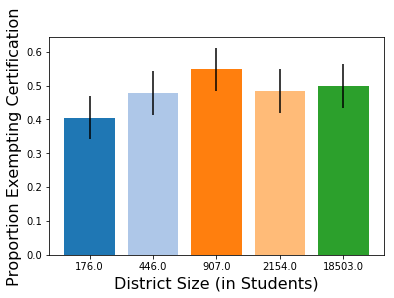

In [89]:
palette = plt.get_cmap('tab20')
# Create bars
plt.bar(p_doi.index, p_doi['ave']['reg21_003'], yerr = p_doi['ci'], color=palette(p_doi.index))

# Create names on the x-axis
plt.xticks(np.arange(5), (p_doi['ave']['students_num']).round())

plt.ylabel('Proportion Exempting Certification', fontsize = 16)
plt.xlabel('District Size (in Students)', fontsize = 16)

#plt.savefig(table_path + 'bar__doi.png', dpi = 600)


In [90]:
results = smf.ols('students_num ~ reg21_003', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           students_num   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                 1.433e-05
Date:                Tue, 06 Nov 2018   Prob (F-statistic):              0.997
Time:                        09:17:17   Log-Likelihood:                -13101.
No. Observations:                1203   AIC:                         2.621e+04
Df Residuals:                    1201   BIC:                         2.622e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4443.4575    520.377      8.539      0.000    3422.508    5464.407
reg21_003     -2.8368    749.440     -0.004      0.997   -1473.194    1467.521
==============================================================================
Omnibus:                     1665.976   Durbin-Watson:                   1.539
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389893.860
Skew:                           7.684   Prob(JB):                         0.00
Kurtosis:                      89.846   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
data['students_num'].sum()
data[data['reg25_081'] == True]['students_num'].sum()
x = data[data['reg25_081'] == True]['students_num'].sum()/data['students_num'].sum()
print(x.round(2))
x = data[data['reg25_081'] == True]['students_hisp'].sum()/data['students_hisp'].sum()
print('hispanic', x.round(2))
x = data[data['reg25_081'] == True]['students_white'].sum()/data['students_white'].sum()
print('white', x.round(2))
x = data[data['reg25_081'] == True]['students_black'].sum()/data['students_black'].sum()
print('black', x.round(2))

0.31
hispanic 0.24
white 0.31
black 0.19


In [94]:
x = data[data['reg21_401'] == True]['students_num'].sum()/data['students_num'].sum()
print('students', x.round(3))

x = data[data['reg21_401'] == True]['students_hisp_num'].sum()/data['students_hisp_num'].sum()
print('hispanic', x.round(3))

x = data[data['reg21_401'] == True]['students_white_num'].sum()/data['students_white_num'].sum()
print('white', x.round(3))

x = data[data['reg21_401'] == True]['students_black_num'].sum()/data['students_black_num'].sum()
print('black', x.round(3))

students 0.064
hispanic 0.051
white 0.094
black 0.059


In [95]:
x = data[data['reg21_102'] == True]['students_num'].sum()/data['students_num'].sum()
print('students', x.round(3))

x = data[data['reg21_102'] == True]['students_hisp_num'].sum()/data['students_hisp_num'].sum()
print('hispanic', x.round(3))

x = data[data['reg21_102'] == True]['students_white_num'].sum()/data['students_white_num'].sum()
print('white', x.round(3))

x = data[data['reg21_102'] == True]['students_black_num'].sum()/data['students_black_num'].sum()
print('black', x.round(3))

students 0.129
hispanic 0.113
white 0.169
black 0.127


In [97]:
x = data[data['reg25_092'] == True]['students_num'].sum()/data['students_num'].sum()
print('students', x.round(3))

x = data[data['reg25_092'] == True]['students_hisp_num'].sum()/data['students_hisp_num'].sum()
print('hispanic', x.round(3))

x = data[data['reg25_092'] == True]['students_white_num'].sum()/data['students_white_num'].sum()
print('white', x.round(3))

x = data[data['reg25_092'] == True]['students_black_num'].sum()/data['students_black_num'].sum()
print('black', x.round(3))

x = data[data['reg25_092'] == True]['students_asian_num'].sum()/data['students_asian_num'].sum()
print('asian', x.round(3))

students 0.285
hispanic 0.261
white 0.295
black 0.321
asian 0.384
